## Describing the dataset:
This dataset containes information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 
A number of characteristics about the patient are includes:
- Patient age.
- date of the scheduled of the appointment and the date the patient acualy scheduled it. 
- location of the hospital.
- whether or not the patient is enrolled in Brasilian welfare program.
- whether if the patient has hypertension, diabetes or a handicape.
- if the patient alcoholic. 
- if the patient received reminder SMS message of the appointment.
- lastly whether the patient actualy showed up to the appointment or not.

## The Questions:
1. Does receive SMS effect the show rate to appiontments?
2. Does females have greater no show rate than males?
3. Do appointmenets no show occur on specific days of the week?


In [118]:
#import important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as ds
import seaborn as sns
%matplotlib inline


## load the data file: 

In [119]:
# load the dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Check if there is any missing value or duplicates in the data set:

#### check for missing value:

In [120]:
# check for missing value in the dataset
(df.notnull().sum() != df.shape[0]).any()


False

#### check for duplicated value:

In [121]:
# check for duplicates in the dataset
df.duplicated().sum() != 0


False

- The above shows that there is missing values nor duplicates in the data set

## Rename columns:

In [122]:
# check the columns names in the loaded dataset
df.columns


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

- I've renamed the misspelled columns and renamed them to be "_" separated

In [123]:
#  to rename the misspelled columns, and set them to be "_" separated
df.rename(columns={'PatientId':'patient_id','AppointmentID':'appointment_id','ScheduledDay':'scheduled_date',
                   'AppointmentDay':'appointment_date','Hipertension':'Hypertension','Handcap':'Handicaped',
                   'No-show':'no_show'}, inplace=True)

# rename columns lower case
df.rename(columns=lambda x : x.lower(), inplace=True)
df.head()


,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicaped,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Correcting columns datatypes:  

In [124]:
# the data types of the columns in the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id          110527 non-null float64
appointment_id      110527 non-null int64
gender              110527 non-null object
scheduled_date      110527 non-null object
appointment_date    110527 non-null object
age                 110527 non-null int64
neighbourhood       110527 non-null object
scholarship         110527 non-null int64
hypertension        110527 non-null int64
diabetes            110527 non-null int64
alcoholism          110527 non-null int64
handicaped          110527 non-null int64
sms_received        110527 non-null int64
no_show             110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- change 'appointment_date' and 'scheduled_date' datatypes from string to datetime

In [126]:
# change 'appointment_date' datatype from string to datetime
df['appointment_date']= pd.to_datetime(df['appointment_date'])

# change 'scheduled_date' datatype from string to datetime
df['scheduled_date']= pd.to_datetime(df['scheduled_date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id          110527 non-null float64
appointment_id      110527 non-null int64
gender              110527 non-null object
scheduled_date      110527 non-null datetime64[ns, UTC]
appointment_date    110527 non-null datetime64[ns, UTC]
age                 110527 non-null int64
neighbourhood       110527 non-null object
scholarship         110527 non-null int64
hypertension        110527 non-null int64
diabetes            110527 non-null int64
alcoholism          110527 non-null int64
handicaped          110527 non-null int64
sms_received        110527 non-null int64
no_show             110527 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


## changeing Yes and No to 1 and 0:  

In [127]:
# changeing the 'no_show' column values from Yes and No to 1 and 0
dic = {'Yes':1, 'No':0}
df['no_show'] = df['no_show'].map(dic)
df.head()


,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicaped,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


## Age values cleaning:

#### The count of records with age less than or equal to zero:

In [128]:
#get the count of 'age' records with invalid age value (less than or equal to zero)
df[df['age'] <= 0].age.count()


3540

#### Replace age values less than or equal to zero with the mean value:

##### The mean of age values

In [129]:
#the mean of 'age' values
int(df[df['age'] > 0].age.mean())

38

##### Replace 0 < = age values with mean value

In [130]:
# to replace the age value when its less than or equal to zero with the mean value
df.loc[ df.age <= 0, "age" ] =  int(df[df['age'] > 0].age.mean())


## Summary for the data:

In [131]:
# get the summary for the numeric features in the dataset 
df.describe()


,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicaped,sms_received,no_show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,38.305961,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,22.103575,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [132]:
# to get the max and min of the feature 'appointment_date' to calculate dateset appointments timespan
print('Max appointment_date:',df['appointment_date'].max(),' Min appointment_date:',df['appointment_date'].min())

# to calculate dateset appointments times from the max and min of the feature 'appointment_date'
print('dataset timespan:',df['appointment_date'].max()-df['appointment_date'].min())


Max appointment_date: 2016-06-08 00:00:00+00:00  Min appointment_date: 2016-04-29 00:00:00+00:00
dataset timespan: 40 days 00:00:00


## Exploration Phase and Questions we are trying to answer:

### Explore the appointments show/no show in the dataset:


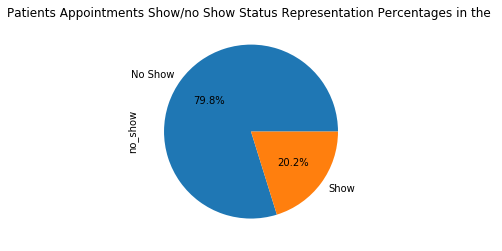

In [150]:
# plot the patients appointments show/no show status pepresentation percentages of the dataset in a pie chart with proper labels and title
pd.value_counts(df['no_show']).plot.pie(autopct='%1.1f%%',labels = ['No Show', 'Show'],title = "Patients Appointments Show/no Show Status Representation Percentages" );


- You can see that almost 80% of the appointmemts in dataset had the status No Show. 

### Explore the month in the timespan of the appointments in the dataset:

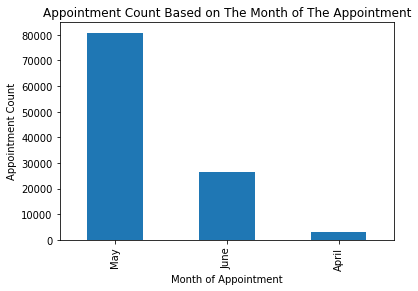

In [156]:
# create new 'appointment_month' column so that we can get the which month appointment was scheduled in
df['appointment_month'] = df['appointment_date'].dt.month_name()

# add the plot for the appointments Count  based on the month of the appointment from the dataset in a bar chart
pd.value_counts(df['appointment_month']).plot.bar()

# set proper labels and title for the bar chart
plt.xlabel("Month of Appointment")
plt.ylabel("Appointment Count")
plt.title('Appointment Count Based on The Month of The Appointment');


- The appointments in the dataset occurred over only three months (April, May and June).

### 1. Does receive SMS effect the show rate to appiontments?¶ 

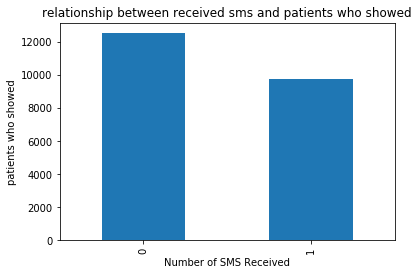

In [141]:
# to plot relationship between received sms and patients who showed in to bar chart
# we get the no show records then group them by 'sms_received' to get the counts
df[df['no_show'] == 1 ].groupby('sms_received').sms_received.count().plot.bar() # we get the no show records then group

# set proper labels and title for the bar chart
plt.xlabel("Number of SMS Received")
plt.ylabel("patients who showed")
plt.title("relationship between received sms and patients who showed");

- You can see that the rate of patients who showed that received sms is acutly lower than the ones the did not this means that receive SMS does not effect the show rate to appiontments.

### 2.Does females have greater no show rate than males?

In [142]:
# get the female records form the dataset
df_female = df[df['gender'] == 'F']

# get the male records form the dataset
df_male = df[df['gender'] == 'M']


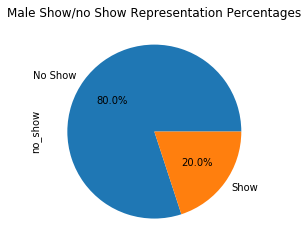

In [143]:
# plot the male show/no show percentages in a pie chart with proper labels and title
pd.value_counts(df_male['no_show']).plot.pie(autopct='%1.1f%%',labels = ['No Show', 'Show'],title = "Male Show/no Show Representation Percentages" );


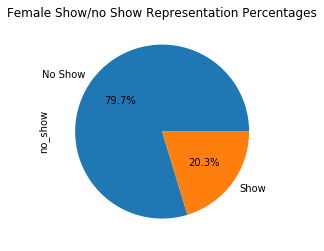

In [144]:
# plot the female show/no show percentages of the dataset in a pie chart with proper labels and title
pd.value_counts(df_female['no_show']).plot.pie(autopct='%1.1f%%', labels = ['No Show', 'Show'],title = "Female Show/no Show Representation Percentages" );


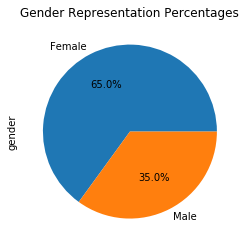

In [145]:
# plot the gender representation percentages of the dataset in a pie chart with proper labels and title
pd.value_counts(df['gender']).plot.pie(autopct='%1.1f%%' , labels = ['Female', 'Male'], title = "Gender Representation Percentages");


- Although no show percentages approximately equal to each other how ever the "Gender Representation Percentages" shows that percentage of famale representation in this data set is twice as large as the male's this mean that more females did not show up to there appointments than males
- This could also indcate that female care more about their health than males

#### 3. Do appointmenets no show occur on specific days of the week?

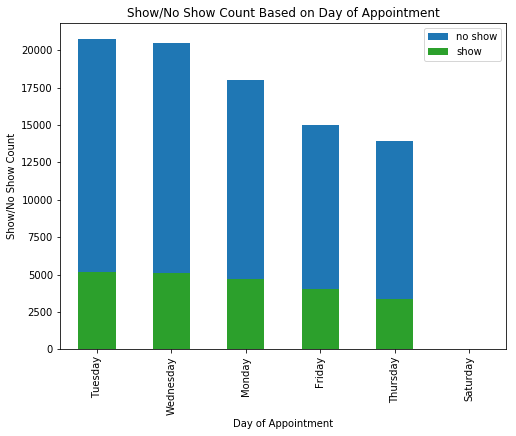

In [148]:
# create new 'day_of_week' column so that we can get the which day of the week the appointment was scheduled
df['day_of_week'] = df['appointment_date'].dt.day_name()

# get the records of appointments where patients have showed up to the appointment form the dataset
df_show = df[df['no_show']==1]

# get the records of appointments where patients have didn't showed up to the appointment form the dataset
df_no_show = df[df['no_show']==0]

# plot the for the appointment no show count vased on the day of the appointment from the dataset in a bar chart
ax = pd.value_counts(df_no_show['day_of_week']).plot.bar()

# add the plot for the appointment show Count based on the day of the appointment from the dataset in a bar chart
pd.value_counts(df_show['day_of_week']).plot.bar( color="C2" ,ax = ax,figsize=(8, 6) )

# set proper labels, title and legend for the bar chart
plt.xlabel("Day of Appointment")
plt.legend(['no show', 'show'])
plt.ylabel("Show/No Show Count")
plt.title('Show/No Show Count Based on The Day of The Appointment');



- The maximum number of appointment no-shows occurred on Tuesdays and the minimum occurred on Thursdays. Overall the rate of no shows  decreases as the week progresses. 

## Limitations:

- Additional external features from other onto this data such as traffic status and weather conditions and occupational status may gives better indcation to that impacts showing to the appointment. 
- The appointments in the dataset occurred over only three months (April, May and June) and spans over a short period of 40 days. A larger time span would provide a better insight seasnal and holiday impact  on patient showing up status the appointment. 

## Conclusions:

- You can see that almost 80% of the appointmemts in dataset had the status No Show. 
- You can see that the rate of patients who showed that received sms is acutly lower than the ones the did not this means that receive SMS does not effect the show rate to appiontments.

- Although no show percentages approximately equal to each other how ever the "Gender Representation Percentages" shows that percentage of famale representation in this data set is twice as large as the male's this mean that more females did not show up to there appointments than males
- This could also indcate that female care more about their health than males

- The maximum number of appointment no-shows occurred on Tuesdays and the minimum occurred on Thursdays. 
- Overall the rate of no shows  decreases as the week progresses. 